# Thống kê suy luận

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Bài tập: Kiểm định giả thuyết

Dữ liệu: Tập dữ liệu bao gồm các điểm của học sinh trong các môn học khác nhau.

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1288\3030859865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], label='match score')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1288\3030859865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'], label='readi

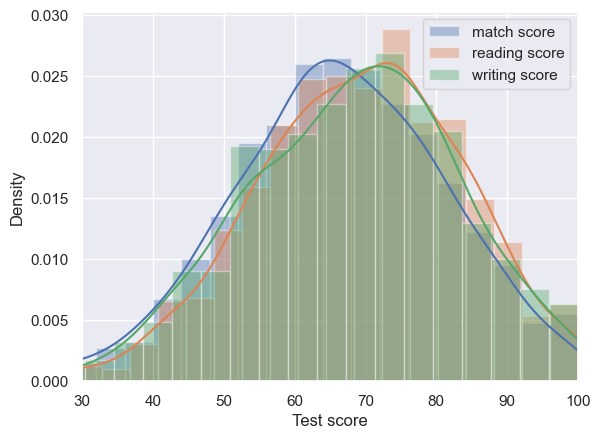

In [10]:
sns.distplot(df['math score'], label='match score')
sns.distplot(df['reading score'], label='reading score')
sns.distplot(df['writing score'], label='writing score')
plt.xlim(30, 100)
plt.xlabel('Test score')
plt.legend();

In [11]:
df.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1288\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### BTVN
Kiểm định giả thuyết không có sự khác nhau về điểm trung bình giữa học sinh tham gia và không tham gia bài kiểm tra trước khoá học. Lựa chọn alpha = 0.05.
- Hãy thực hiện theo ít nhất 1 trong những cách sau: sử dụng công thức (nếu được, tham khảo https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1) và sử dụng thư viện.
- Vẽ phân bố xác suất tương ứng và vị trí của các điểm statistic và critical.

In [12]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Your code goes here

# math score

In [13]:
# sử dụng z-test
# gọi u1 là mean của none (mặc định là mean mẫu)
# gọi u2  là mean của complete
# null hypothesis: h0: u1 = u2
# alternative hypothesis: ha = u1 != u2

In [27]:
# tính điểm trung bình của none
mean_math_none = df.loc[df['test preparation course'] == 'none', 'math score'].mean()
print(mean_math_none)
u = mean_math_none

64.0778816199377


In [25]:
mean_math_completed = df.loc[df['test preparation course']=='completed',
                            'math score'].mean()
print(mean_math_completed)
x = mean_math_completed

69.69553072625699


In [28]:
import math

In [30]:
n = 1000
significant_level = 0.05
s = df['math score'].std()
z_statistic = (x-u)*s/math.sqrt(n)
print(z_statistic)

2.693655412468109


In [ ]:
# SO SÁNH KHÁC BẰNG => TWO TAILED TEST

In [31]:
from scipy.stats import norm
alpha = 0.05
z_critical = norm.ppf(1-(alpha/2))
print(z_critical)

1.959963984540054


In [32]:
abs(z_statistic) > abs(z_critical)

True

KẾT LUẬN: Đối với điểm toán, PHỦ ĐỊNH GIẢ THUYẾT H0: U1 = U2
suy luận điểm trung bình giữa 2 nhóm học sinh đã có chuẩn bị cho test và ngược lại là khác nhau (có thể nhóm completed có điểm trung bình toán cao hơn)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1288\65781898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'],label='math score')


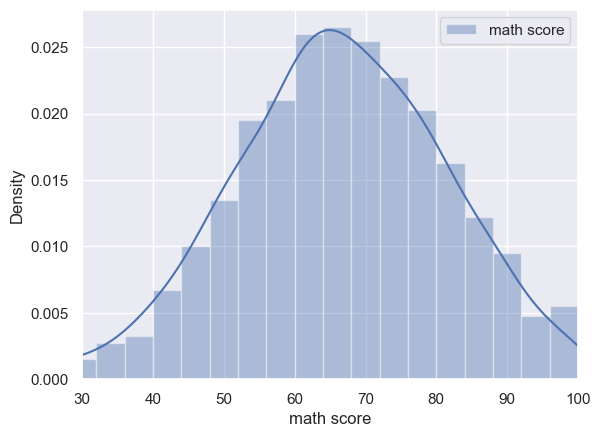

In [34]:
sns.distplot(df['math score'],label='math score')
plt.xlim(30,100)
plt.xlabel('math score')
plt.legend()

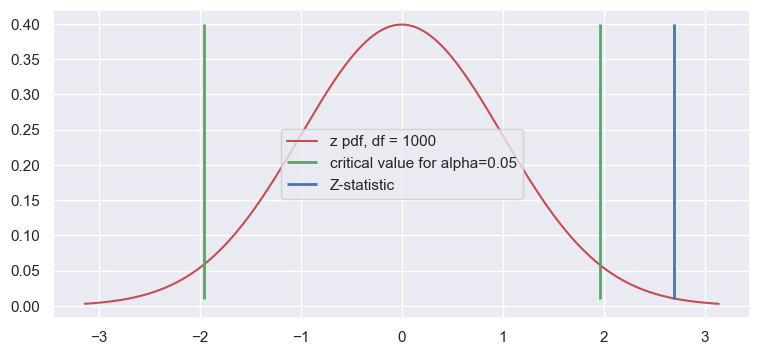

In [51]:
x = np.linspace(-3.14,3.14,1000)
y = norm.pdf(x,0,1)
z_critical_left = -z_critical

plt.figure(figsize=(9,4),dpi=100)
plt.plot(x,y,'r',label=f'z pdf, df = {n}')
plt.vlines(x=[z_critical_left,z_critical],color='g',linewidth=2,
          ymin=0.01,ymax=0.4,label=f'critical value for alpha={alpha}')
plt.vlines(z_statistic,ymin=0.01,ymax=0.4,color='b',linewidth=2,
         label = "Z-statistic")
plt.legend(loc=10);

# Average score

In [60]:
#df

In [58]:
df['average score'] = df[['math score','reading score','writing score']].mean(axis=1)

In [59]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [66]:
mean_average_none = df.loc[df['test preparation course']=='none', 'average score'].mean()
mean_average_none
u = mean_average_none

In [67]:
mean_average_completed = df.loc[df['test preparation course']=='completed','average score'].mean()
mean_average_completed
x = mean_average_completed

In [65]:
z_critical = norm.ppf(1-alpha/2)
z_critical

1.959963984540054

In [69]:
z_statistic = (x-u)*s/math.sqrt(n)
z_statistic

3.6588239718863247

# kết luận
giả thuyết Ho: u1 = u2 bị bác bỏ do Z_sta > Z_cri

chấp nhận giả thuyết thay thế Ha: u1 != u2

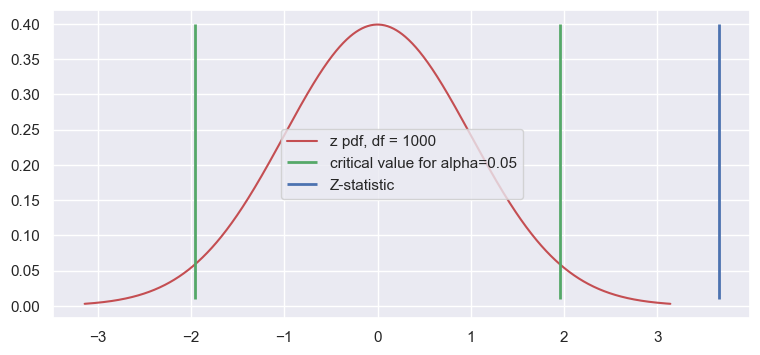

In [70]:
x = np.linspace(-3.14,3.14,1000)
y = norm.pdf(x,0,1)
z_critical_left = -z_critical

plt.figure(figsize=(9,4),dpi=100)
plt.plot(x,y,'r',label=f'z pdf, df = {n}')
plt.vlines(x=[z_critical_left,z_critical],color='g',linewidth=2,
          ymin=0.01,ymax=0.4,label=f'critical value for alpha={alpha}')
plt.vlines(z_statistic,ymin=0.01,ymax=0.4,color='b',linewidth=2,
         label = "Z-statistic")
plt.legend(loc=10);